In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

In [2]:
data = pd.read_csv('cardio_train.csv', sep=";")

In [3]:
data.drop(columns=['id'], inplace=True)


In [4]:
data['age'] = data['age'] // 365

In [5]:
data['gender'] = data['gender'].map({1: 0, 2: 1})


In [6]:
data.dropna(inplace=True)


In [7]:
X = data.drop(columns=['cardio'])
y = data['cardio']

In [8]:
print(data.describe())
print()

                age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      52.840671      0.349571    164.359229     74.205690    128.817286   
std        6.766774      0.476838      8.210126     14.395757    154.011419   
min       29.000000      0.000000     55.000000     10.000000   -150.000000   
25%       48.000000      0.000000    159.000000     65.000000    120.000000   
50%       53.000000      0.000000    165.000000     72.000000    120.000000   
75%       58.000000      1.000000    170.000000     82.000000    140.000000   
max       64.000000      1.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250      0.572270    

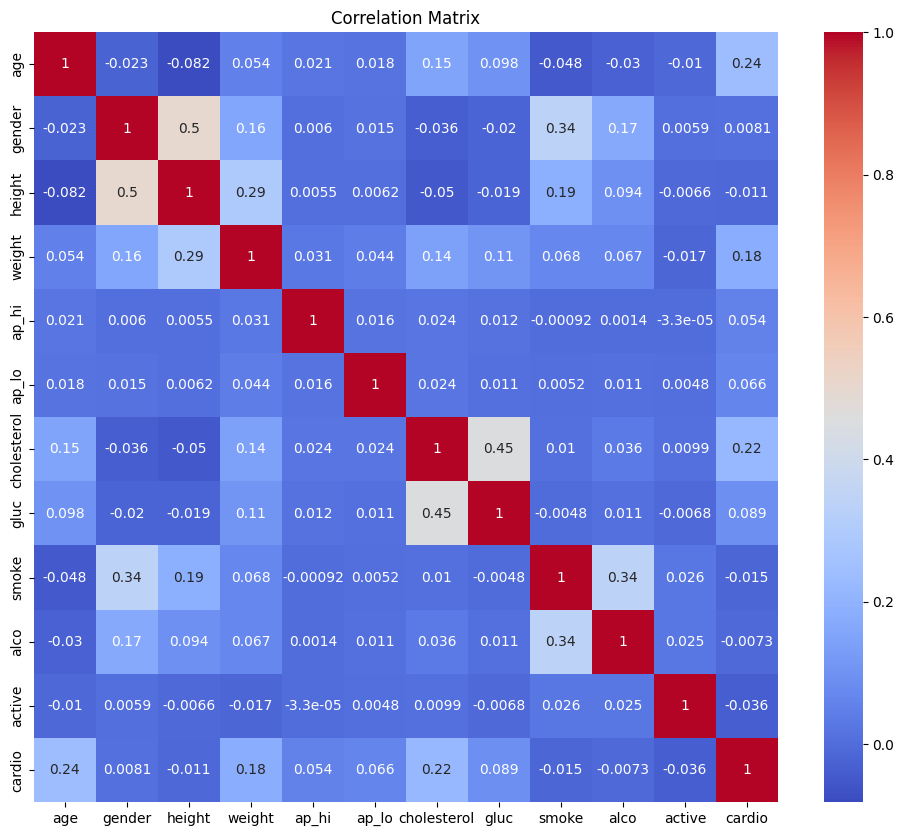

In [9]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
print()

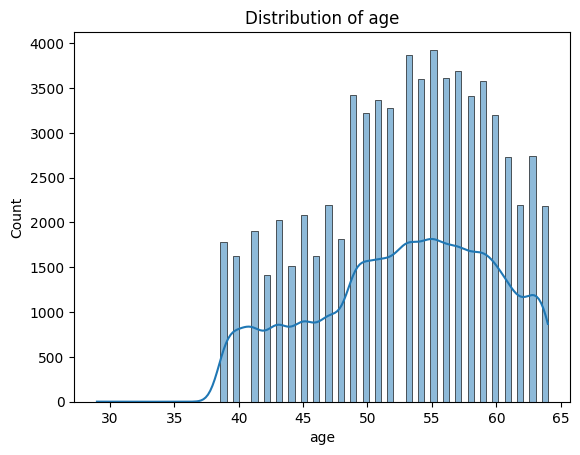

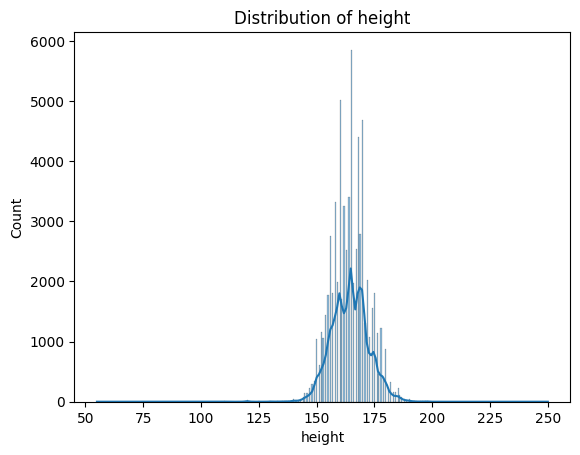

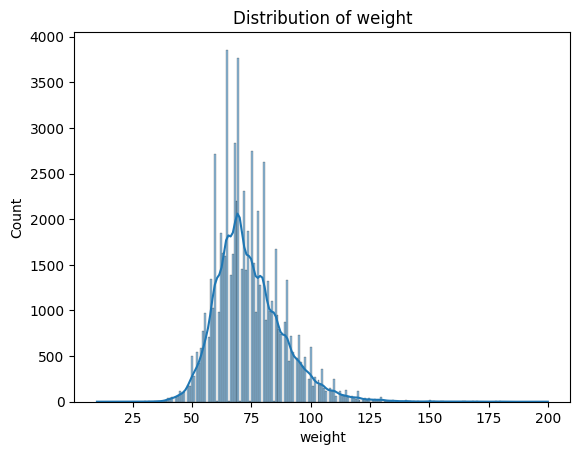

In [10]:
num_features = ['age', 'height', 'weight']
for feature in num_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
print()

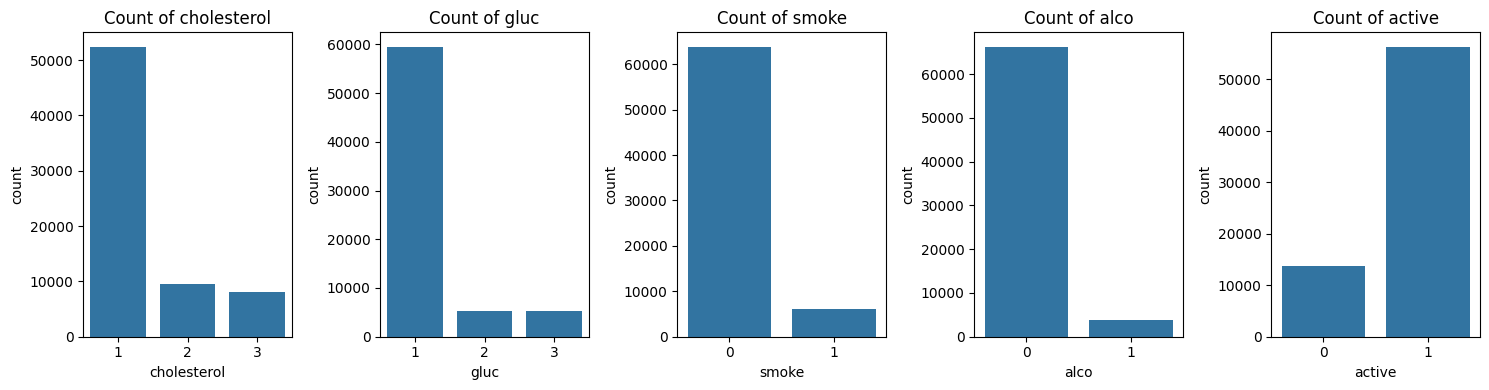

In [11]:
cat_features = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']

fig, axes = plt.subplots(1, len(cat_features), figsize=(15, 4))  # Create subplots

for i, feature in enumerate(cat_features):
    sns.countplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Count of {feature}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [14]:
y_pred = model.predict(X_test)


In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')



Accuracy: 0.74


In [16]:
print('\nClassification Report:')
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



In [17]:
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[5413 1575]
 [2109 4903]]


In [ ]:
def get_int_input(prompt, valid_values=None, min_val=None, max_val=None):
    while True:
        try:
            value = int(input(prompt))
            if (valid_values is None or value in valid_values) and (min_val is None or min_val <= value <= max_val):
                return value
            print(f"Invalid input! Please enter a valid number {valid_values if valid_values else f'between {min_val} and {max_val}'}")
        except ValueError:
            print("Invalid input! Please enter a valid integer.")

def get_float_input(prompt, min_val=None, max_val=None):
    while True:
        try:
            value = float(input(prompt))
            if (min_val is None or value >= min_val) and (max_val is None or value <= max_val):
                return value
            print(f"Invalid input! Please enter a number between {min_val} and {max_val}.")
        except ValueError:
            print("Invalid input! Please enter a valid number.")

user_input = {
    'age': get_int_input('Enter your age in years: ', min_val=1, max_val=120),
    'gender': get_int_input('Enter your gender (0: Female, 1: Male): ', [0, 1]),
    'height': get_float_input('Enter your height in centimeters: ', min_val=50, max_val=250),
    'weight': get_float_input('Enter your weight in kilograms: ', min_val=10, max_val=300),
    'ap_hi': get_int_input('Enter your systolic blood pressure: ', min_val=50, max_val=250),
    'ap_lo': get_int_input('Enter your diastolic blood pressure: ', min_val=30, max_val=200),
    'cholesterol': get_int_input('Enter your cholesterol level (1: normal, 2: above normal, 3: well above normal): ', [1, 2, 3]),
    'gluc': get_int_input('Enter your glucose level (1: normal, 2: above normal, 3: well above normal): ', [1, 2, 3]),
    'smoke': get_int_input('Do you smoke? (0: No, 1: Yes): ', [0, 1]),
    'alco': get_int_input('Do you consume alcohol? (0: No, 1: Yes): ', [0, 1]),
    'active': get_int_input('Are you physically active? (0: No, 1: Yes): ', [0, 1])
}

# Ensure systolic blood pressure is greater than diastolic
while user_input["ap_hi"] <= user_input["ap_lo"]:
    print("Error: Systolic blood pressure must be higher than diastolic.")
    user_input["ap_hi"] = get_int_input('Re-enter your systolic blood pressure: ', min_val=50, max_val=250)
    user_input["ap_lo"] = get_int_input('Re-enter your diastolic blood pressure: ', min_val=30, max_val=200)

print("\nUser Input:", user_input)


In [19]:
user_data = pd.DataFrame(user_input, index=[0])
user_data['age'] = user_data['age'] // 365
user_data['gender'] = user_data['gender'].map({1: 0, 2: 1})
user_data = scaler.transform(user_data)

In [20]:
prediction = model.predict(user_data)[0]
print()
if prediction == 0:
    print("Congratulations! You are predicted to be free of cardiovascular disease.")
else:
    print("You are predicted to have cardiovascular disease. Please consult a doctor for further evaluation.")


You are predicted to have cardiovascular disease. Please consult a doctor for further evaluation.
